In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
df = pd.read_csv("Admission_Predict.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.isnull().sum()


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.drop('Serial No.', axis=1, inplace=True)


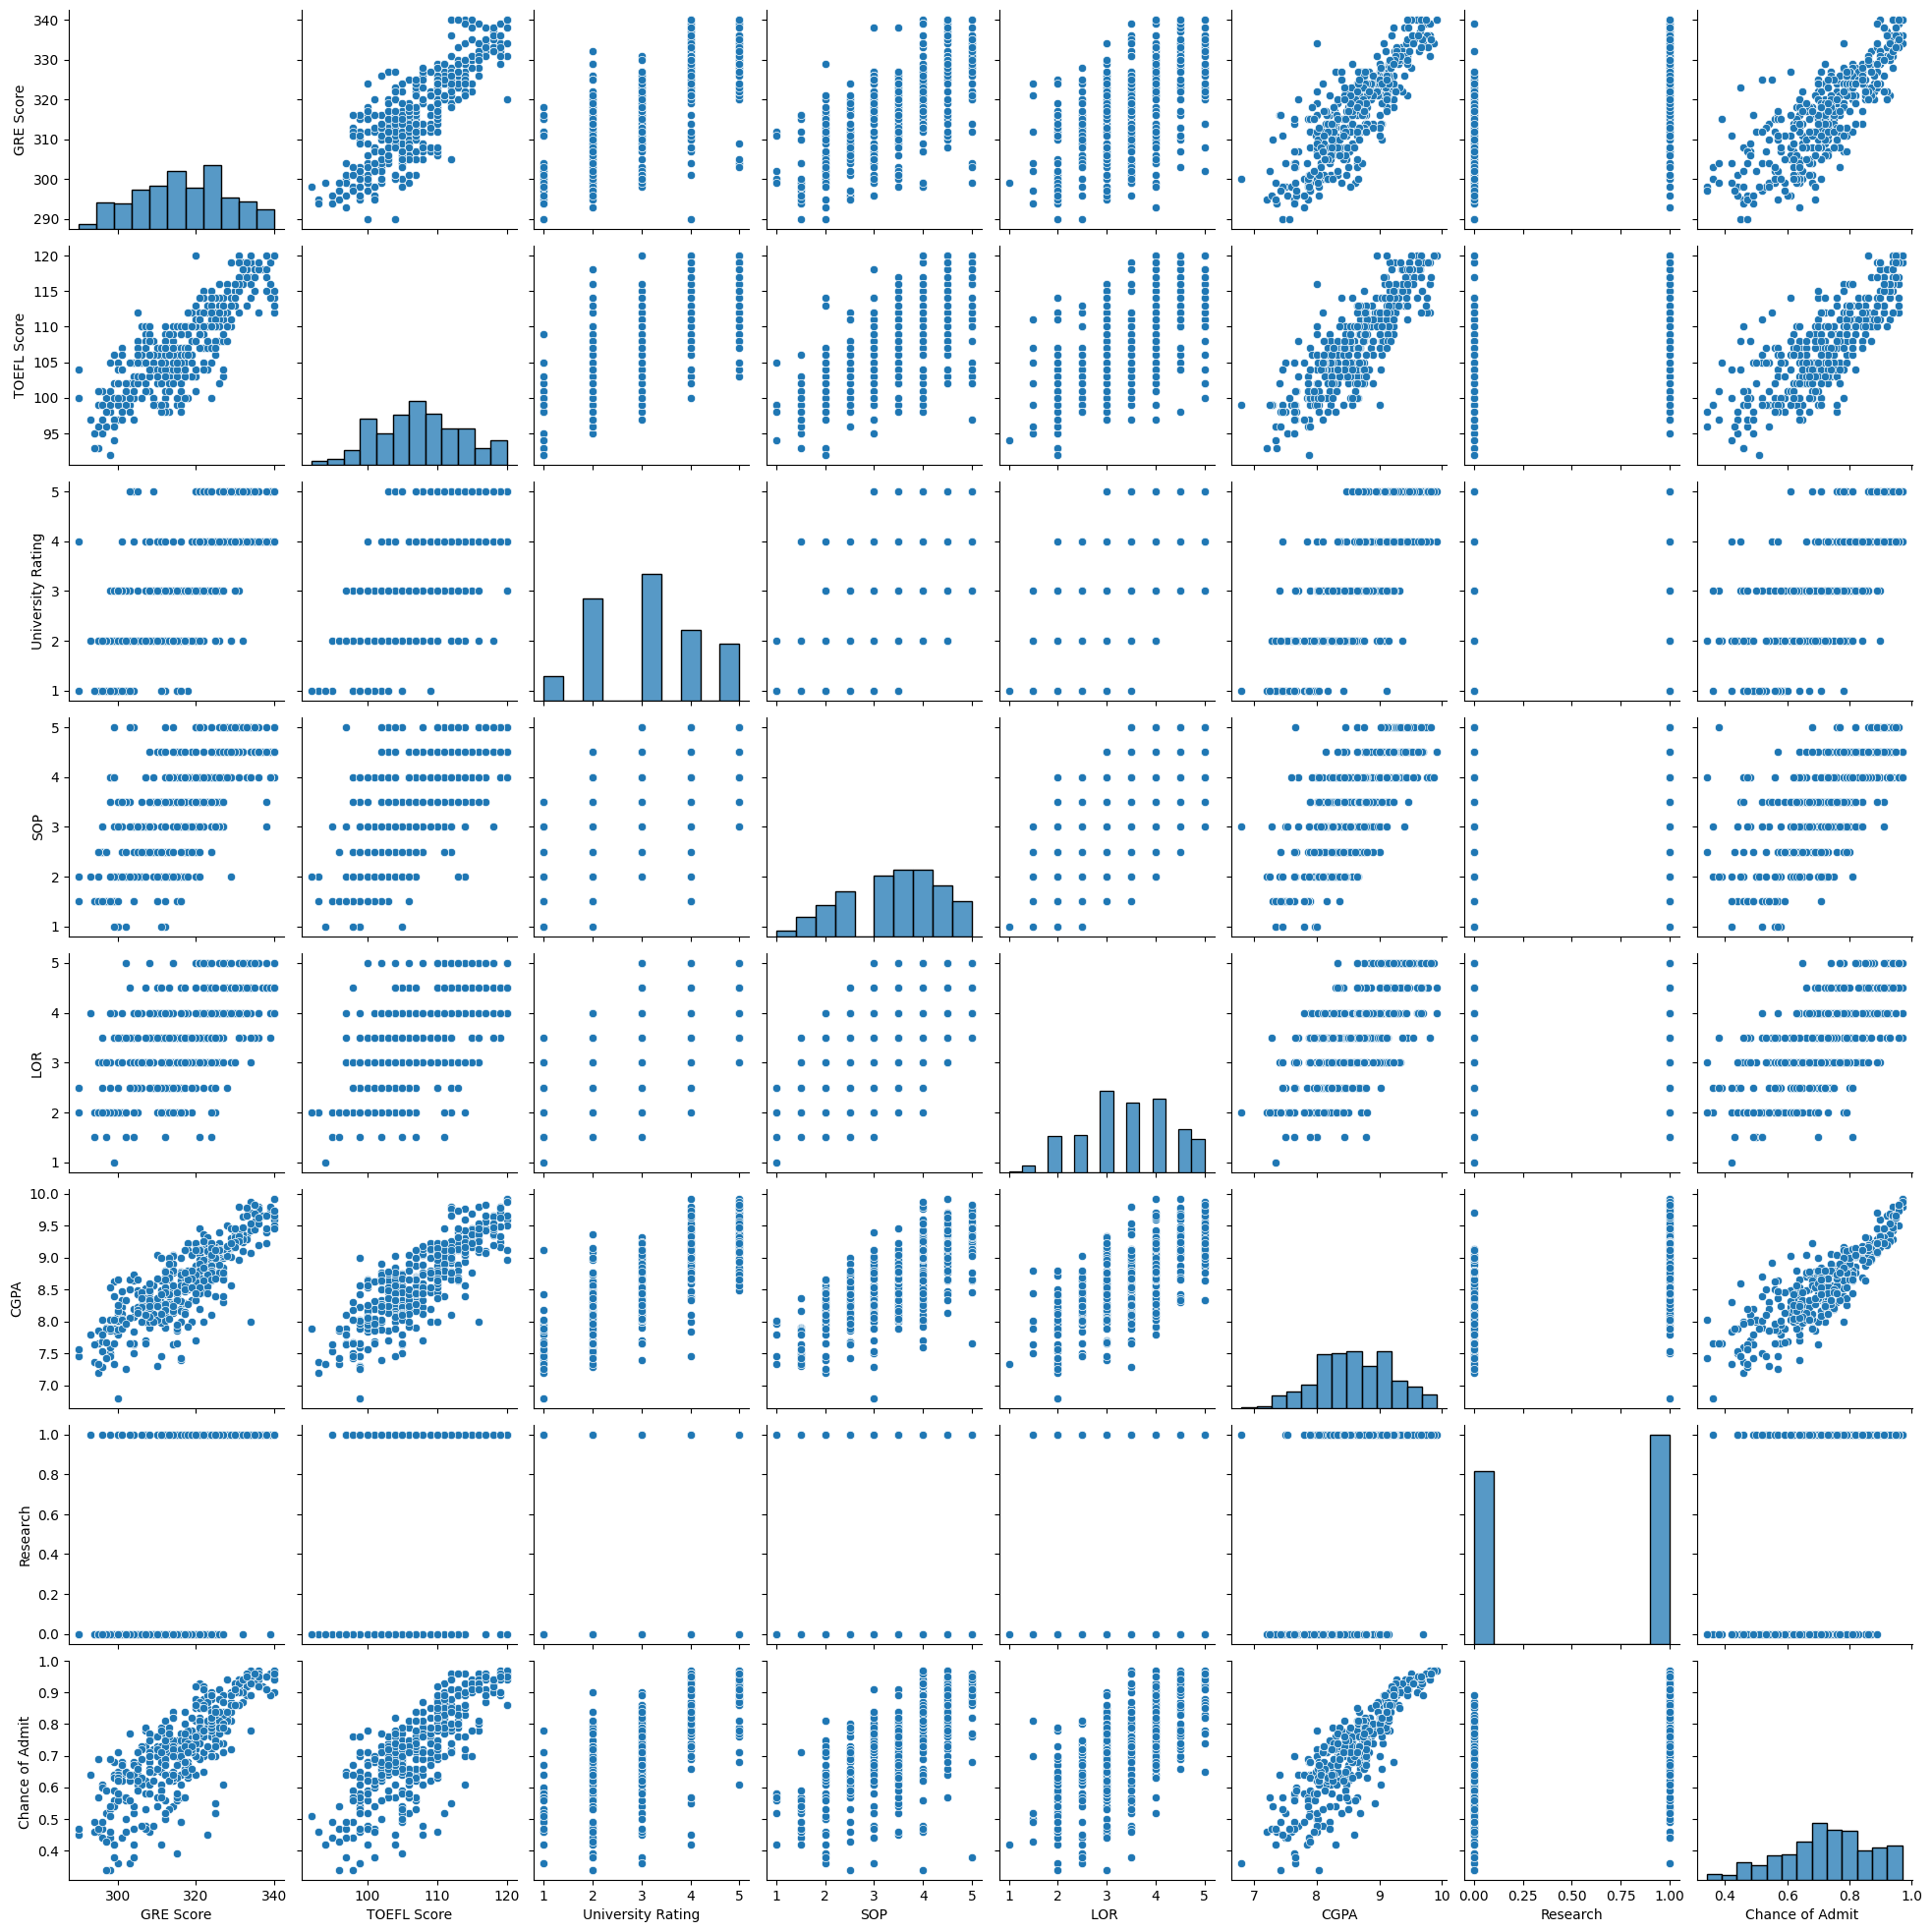

<Axes: >

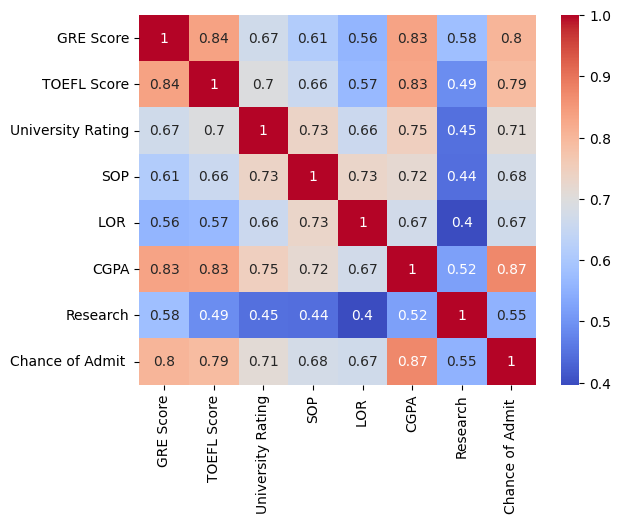

In [ ]:
sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [ ]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R-squared: 0.8212082591486993
Mean Squared Error: 0.004617003377285005


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)


R2 Score: 0.8212082591486993
Mean Squared Error: 0.004617003377285005


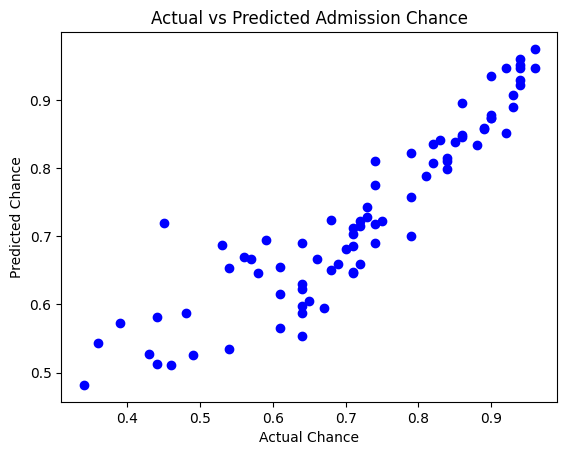

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Chance")
plt.ylabel("Predicted Chance")
plt.title("Actual vs Predicted Admission Chance")
plt.show()


In [ ]:
new_data = [[320, 110, 4, 4.5, 4, 9.2, 1]]
prediction = model.predict(new_data)
print("Predicted Chance of Admission:", prediction[0])


Predicted Chance of Admission: 0.833831668577875


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
